In [187]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [188]:
#filename_base = "xp2_migr_20180619084743" # 20, 0
#filename_base="xp2_migr_20180619094324" #20,25
#filename_base="xp2_migr_20180618225904" # 20, 50

experiments = glob.glob("./results/*")

df = None
df_migr = None
df_agent = None

for experiment in experiments:
    filename_base = experiment.split("/")[2]
    experiment=filename_base
    #filename_base="xp2_migr_20180621170259_50_0" # 50 agents, 0 active processes (which are going to be migrated)
    #filename_base="xp2_migr_20180623033156_50_25" # 50,25
    #filename_base="xp2_migr_20180623151601_50_50" #50,50
    test_descriptor=None
    split_experiment = filename_base.split("_")
    if len(split_experiment)<6:
        continue
    if experiment.find("xp2") == -1:
        continue
    
   
    files = glob.glob("./results/{0}/*.csv".format(filename_base))
    print (experiment)
    for f in files:
        
        #print (f)
        filename=os.path.basename(f)
        name = filename.split(".")[0].split("_")
        
        if ("_pre_" in filename) or ("_post_" in filename):
            df_tmp = pd.read_csv(f,parse_dates=["start", "end"], sep=",")
            
            df_tmp["experiment"] = filename_base
            df_tmp["agent_nb"] = int(split_experiment[3])
            df_tmp["active_process_nb"] = int(split_experiment[4])
            
            #df_tmp["faban_agent"] = int(name[4])
            df_tmp["tenant"] = name[7]
            df_tmp["bpm"] = split_experiment[5]
            if "_pre_" in filename:
                df_tmp["type"] = "pre"
            if "_post_" in filename:
                df_tmp["type"] = "post"
            df_tmp["taskId"] = df_tmp["task_id"]
            df_tmp["relative_start_tenant"] = (df_tmp["start"] - df_tmp["start"].min()).astype("timedelta64[ms]")
            #df_tmp = df_tmp.set_index(["task_id","type", "agent_nb", "active_process_nb"])
            if df is None:
                df = df_tmp
            else:
                df = pd.concat([df, df_tmp])
        if (len(name) > 4 and (name[6] == "migr")):
            df_tmp = pd.read_csv(f, names = ["ts","nb","duration_disable","duration_move","duration_enable","duration_total"])
            df_tmp["ts"] = pd.to_datetime(df_tmp["ts"])
            df_tmp["experiment"] = filename_base
            df_tmp["bpm"] = split_experiment[5]
            if df_migr is None:
                df_migr = df_tmp
            else:
                df_migr = pd.concat([df_migr, df_tmp])
            
        if filename=="test_descriptor.csv":
            with open(f, mode='r') as infile:
                reader = csv.reader(infile)
                test_descriptor = dict((rows[0],rows[1]) for rows in reader)
        if ("_agent" in filename):
            df_tmp = pd.read_csv(f, sep=",", dtype={'taskId':int},parse_dates=["Req_retrieve_Time","Resp_retrieve_Time","Req_Assign_Tim","Resp_Assign_Time","Req_exec_Time","Resp_exec_Time","Retrive_Time","Assign_Time","Exec_Time"])
            df_tmp["experiment"] = filename_base
            if "pre_" in filename:
                df_tmp["type"] = "pre"
            if "post_" in filename:
                df_tmp["type"] = "post"
            #df_tmp["agent_nb"] = int(split_experiment[3])
            #df_tmp["active_process_nb"] = int(split_experiment[4])
            #df_tmp["faban_agent"] = int(name[4])    
            df_tmp["tenant"] = name[8]
            #df_tmp = df_tmp.set_index(["taskId","type", "agent_nb", "active_process_nb"])
            
            if df_agent is None:
                df_agent = df_tmp
            else:
                df_agent = pd.concat([df_agent, df_tmp])
    
    if test_descriptor is not None and df is not None:
        print(test_descriptor["faban_agents"])
        df.loc[(df.experiment == experiment, "faban_agents")] = test_descriptor["faban_agents"]
print(df.dtypes)

xp2_migr_3-100_100_0_TestHumanTask
1
xp2_migr_5-100_100_0_TestHumanTask
1
xp2_migr_4-100_100_0_additionalApproval


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:53: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



1
xp2_migr_2-100_100_0_additionalApproval
1
xp2_migr_1-100_100_0_additionalApproval
1
xp2_migr_3-100_100_0_additionalApproval
1
xp2_migr_1-100_100_0_TestHumanTask
1
xp2_migr_600-100_100_0_TestHumanTask
1
xp2_migr_3-100_100_0_M3Process
1
xp2_migr_1-100_100_0_M3Process
1
xp2_migr_0-100_100_0_additionalApproval
1
xp2_migr_4-100_100_0_M3Process
1
xp2_migr_4-100_100_0_TestHumanTask
1
xp2_migr_5-100_100_0_additionalApproval
1
xp2_migr_2-100_100_0_M3Process
1
xp2_migr_0-100_100_0_M3Process
1
xp2_migr_5-100_100_0_M3Process
1
xp2_migr_2-100_100_0_TestHumanTask
1
Unnamed: 0                        int64
active_process_nb                 int64
agent_nb                          int64
bpm                              object
duration                        float64
end                      datetime64[ns]
experiment                       object
faban_agents                     object
id                                int64
ready                           float64
relative_start_tenant           float64


In [189]:
df_migr.index = df_migr["ts"]
min_start = pd.to_datetime(df.groupby("experiment")["start"].min())
df_migr["min_start"] = None
df["min_start"] = None
df["min_start"] = None


print(min_start)
for ind in min_start.index:
    df.loc[df.experiment == ind, "min_start"] = pd.to_datetime(min_start[ind])
    df_migr.loc[df_migr.experiment == ind, "min_start"]  = pd.to_datetime(min_start[ind])
for ind in min_start.index:
    df.loc[df.experiment == ind, "min_task_start"] = pd.to_datetime(min_start[ind])
       
df_migr["min_start"] = pd.to_datetime(df_migr["min_start"])
df["min_start"] = pd.to_datetime(df["min_start"])
df_migr["relative_start"] = (df_migr["ts"]-df_migr["min_start"]).astype("timedelta64[ms]")
df["relative_start"] = (df["start"]-df["min_start"]).astype("timedelta64[ms]")
df["relative_end"] = (df["end"]-df["min_start"]).astype("timedelta64[ms]")

df["relative_task_start"] = (df["task_start"].astype("datetime64[ms]")-df["min_task_start"]).astype("timedelta64[ms]")
df["relative_task_end"] = (df["task_end"].astype("datetime64[ms]")-df["min_task_start"]).astype("timedelta64[ms]")

df_migr["relative_end"] = df_migr["relative_start"] + df_migr["duration_total"]*1000
df_migr["end_pre"] = None
df_migr["begin_post"] = None
df_migr["end_post"] = None

for experiment in df_migr.experiment:
    print(experiment)
    #print("{0}-{1}".format(experiment, df_migr[df_migr["experiment"] == experiment]["relative_start"].item()))
    #print(df_migr[df_migr["experiment"] == experiment]["relative_start"])

    dd = df_migr[df_migr["experiment"] == experiment]["relative_start"].item()
    print(dd)
    df.loc[(df.relative_start<dd), "type"] = "pre"

    
    m = df_migr[df_migr["experiment"] == experiment]["relative_start"].item()
    df.loc[df.experiment == experiment, "begin_migr"] = m
    m = df_migr[df_migr["experiment"] == experiment]["relative_end"].item()
    df.loc[df.experiment == experiment, "end_migr"] = m
    
    m = df[(df.experiment == experiment)&(df.type=="pre")]["relative_start"].min()
    df_migr.loc[(df_migr.experiment == experiment, "begin_pre")] = m
    df.loc[df.experiment == experiment, "begin_pre"] = m
    
    m = df[(df.experiment == experiment)&(df.type=="pre")]["relative_start"].max()
    df_migr.loc[(df_migr.experiment == experiment, "end_pre")] = m
    df.loc[df.experiment == experiment, "end_pre"] = m

    m = df[(df.experiment == experiment)&(df.type=="post")]["relative_start"].min()
    df_migr.loc[(df_migr.experiment == experiment, "begin_post")] = m
    df.loc[df.experiment == experiment, "begin_post"] = m

    m = df[(df.experiment == experiment)&(df.type=="post")]["relative_start"].max()
    df_migr.loc[(df_migr.experiment == experiment, "end_post")] = m
    df.loc[df.experiment == experiment, "end_post"] = m  

experiment
xp2_migr_0-100_100_0_M3Process            2018-07-17 16:34:11.753
xp2_migr_0-100_100_0_additionalApproval   2018-07-17 15:14:26.193
xp2_migr_1-100_100_0_M3Process            2018-07-17 17:00:33.694
xp2_migr_1-100_100_0_TestHumanTask        2018-07-17 14:21:33.858
xp2_migr_1-100_100_0_additionalApproval   2018-07-17 15:40:52.445
xp2_migr_2-100_100_0_M3Process            2018-07-17 17:26:59.528
xp2_migr_2-100_100_0_TestHumanTask        2018-07-17 14:48:02.385
xp2_migr_2-100_100_0_additionalApproval   2018-07-17 16:07:33.362
xp2_migr_3-100_100_0_M3Process            2018-07-19 03:12:22.299
xp2_migr_3-100_100_0_TestHumanTask        2018-07-19 00:55:40.211
xp2_migr_3-100_100_0_additionalApproval   2018-07-19 01:52:36.927
xp2_migr_4-100_100_0_M3Process            2018-07-19 03:38:44.811
xp2_migr_4-100_100_0_TestHumanTask        2018-07-19 01:22:08.051
xp2_migr_4-100_100_0_additionalApproval   2018-07-19 02:18:58.065
xp2_migr_5-100_100_0_M3Process            2018-07-19 04:05:09.300

In [190]:
df["min_agent_task_start"] = None
df_agent["min_agent_task_start"]=None
min_agent_task_start = pd.to_datetime(df_agent.groupby("experiment")["Req_retrieve_Time"].min())
print (df_agent.describe())
for ind in min_agent_task_start.index:
    print ("{0} {1}".format(ind, min_agent_task_start[ind]))
    df_agent.loc[df_agent.experiment == ind, "min_agent_task_start"] = min_agent_task_start[ind]
df_agent["min_agent_task_start"] = pd.to_datetime(df_agent["min_agent_task_start"])
print (df_agent[["Req_retrieve_Time","min_agent_task_start"]].dtypes)    
df_agent["relative_agent_task_start"] = (df_agent["Req_retrieve_Time"]-df_agent["min_agent_task_start"]).astype("timedelta64[ms]")
df_agent["relative_agent_task_end"] = (df_agent["Resp_exec_Time"]-df_agent["min_agent_task_start"]).astype("timedelta64[ms]")
 

             taskId
count  332523.00000
mean    74367.04870
std     54847.66256
min         2.00000
25%     27554.00000
50%     60546.00000
75%    120139.00000
max    197106.00000
xp2_migr_0-100_100_0_M3Process 2018-07-17 16:34:12.512000
xp2_migr_0-100_100_0_additionalApproval 2018-07-17 15:14:30.078000
xp2_migr_1-100_100_0_M3Process 2018-07-17 17:00:34.678000
xp2_migr_1-100_100_0_TestHumanTask 2018-07-17 14:21:34.707000
xp2_migr_1-100_100_0_additionalApproval 2018-07-17 15:40:54.842000
xp2_migr_2-100_100_0_M3Process 2018-07-17 17:27:00.211000
xp2_migr_2-100_100_0_TestHumanTask 2018-07-17 14:48:03.268000
xp2_migr_2-100_100_0_additionalApproval 2018-07-17 16:07:34.253000
xp2_migr_3-100_100_0_M3Process 2018-07-19 03:12:23.596000
xp2_migr_3-100_100_0_TestHumanTask 2018-07-19 00:55:41.084000
xp2_migr_3-100_100_0_additionalApproval 2018-07-19 01:52:38.378000
xp2_migr_4-100_100_0_M3Process 2018-07-19 03:38:45.860000
xp2_migr_4-100_100_0_TestHumanTask 2018-07-19 01:22:08.520000
xp2_migr_4-100

In [199]:
all_data = pd.merge(df, df_agent, on=["taskId","experiment"])
all_data["ready"] = pd.to_datetime(all_data["ready"]/1000, unit="s")

all_data["task_start"] = pd.to_datetime(all_data["task_start"]/1000, unit="s")
all_data["task_ready"] = pd.to_datetime(all_data["task_ready"]/1000, unit="s")
all_data["task_assign"] = pd.to_datetime(all_data["task_assign"]/1000, unit="s")
all_data["task_end"] = pd.to_datetime(all_data["task_end"]/1000, unit="s")
all_data["duration_agent"] = ((all_data["Req_Assign_Tim"] - all_data["Resp_retrieve_Time"]) + (all_data["Req_exec_Time"] - all_data["Resp_Assign_Time"]) + (all_data["Req_retrieve_Time"] - all_data["task_ready"])).astype('timedelta64')
all_data["duration_restricted"] = (all_data["end"] - all_data["start"] - ((all_data["Req_Assign_Tim"] - all_data["Resp_retrieve_Time"]) + (all_data["Req_exec_Time"] - all_data["Resp_Assign_Time"]) + (all_data["Req_retrieve_Time"] - all_data["task_ready"]))).astype('timedelta64[ms]')
all_data["retrieve_duration"] = (all_data["Req_retrieve_Time"] - all_data["task_ready"]).astype('timedelta64[ms]')

#print (all_data["relative_start"].sort_values().astype("timedelta64[ms]"))
all_data["bpms_task_exec"]=(all_data["task_end"]-all_data["task_start"]).astype("timedelta64[ms]")
all_data["agentbpm_task_exec"]=(all_data["Resp_exec_Time"]-all_data["Req_retrieve_Time"]).astype("timedelta64[ms]")
all_data["agentbpm_task_exec_restricted"]= all_data["agentbpm_task_exec"] - ((all_data["Req_Assign_Tim"] - all_data["Resp_retrieve_Time"]) + (all_data["Req_exec_Time"] - all_data["Resp_Assign_Time"])).astype('timedelta64[ms]')

all_data["relative_start_second"] = all_data["relative_start"]//1000
all_data["relative_task_start_second"] = all_data["relative_task_start"]//1000
all_data["relative_agent_task_start_second"] = all_data["relative_agent_task_start"]//1000


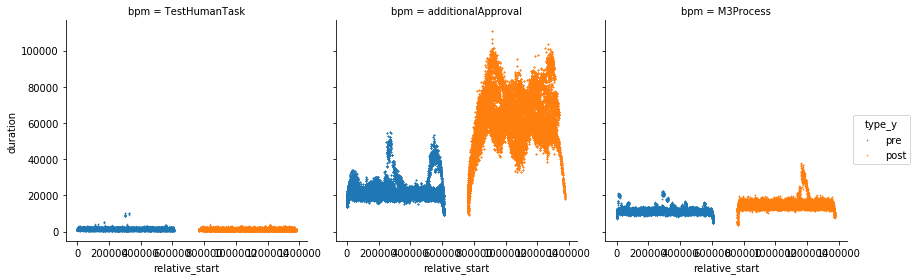

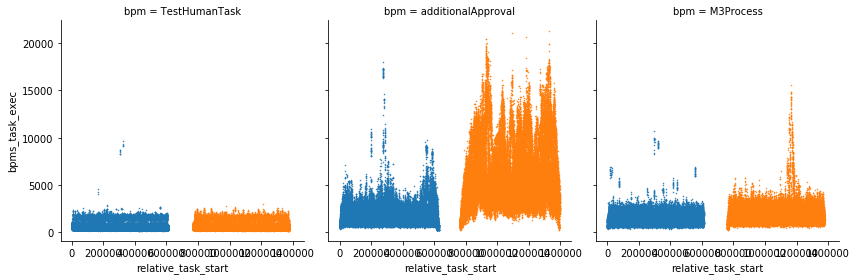

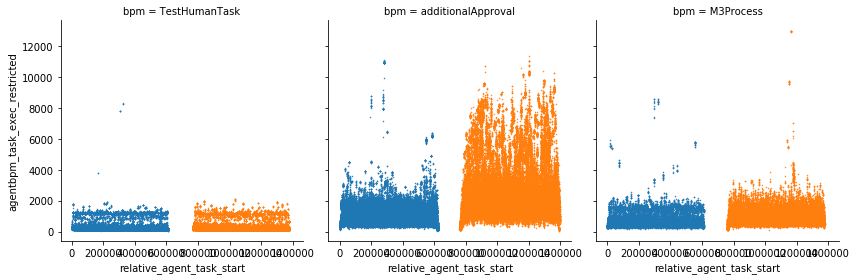

In [201]:
g = sns.FacetGrid(all_data,  col="bpm", hue="type_y",size=4,hue_order=["pre", "post"],hue_kws=dict(marker=[".", "."]))
g = (g.map(plt.scatter, "relative_start", "duration", s=1).add_legend())
g = sns.FacetGrid(all_data,col="bpm", hue="type_y",size=4,hue_order=["pre", "post"],hue_kws=dict(marker=[".", "."]))
g = (g.map(plt.scatter, "relative_task_start", "bpms_task_exec", s=1))
g = sns.FacetGrid(all_data, col="bpm", hue="type_y",size=4,hue_order=["pre", "post"],hue_kws=dict(marker=[".", "."]))
g = (g.map(plt.scatter, "relative_agent_task_start", "agentbpm_task_exec_restricted", s=1))

experiment
xp2_migr_0-100_100_0_M3Process             AxesSubplot(0.125,0.125;0.775x0.755)
xp2_migr_0-100_100_0_additionalApproval    AxesSubplot(0.125,0.125;0.775x0.755)
xp2_migr_1-100_100_0_M3Process             AxesSubplot(0.125,0.125;0.775x0.755)
xp2_migr_1-100_100_0_TestHumanTask         AxesSubplot(0.125,0.125;0.775x0.755)
xp2_migr_1-100_100_0_additionalApproval    AxesSubplot(0.125,0.125;0.775x0.755)
xp2_migr_2-100_100_0_M3Process             AxesSubplot(0.125,0.125;0.775x0.755)
xp2_migr_2-100_100_0_TestHumanTask         AxesSubplot(0.125,0.125;0.775x0.755)
xp2_migr_2-100_100_0_additionalApproval    AxesSubplot(0.125,0.125;0.775x0.755)
xp2_migr_3-100_100_0_M3Process             AxesSubplot(0.125,0.125;0.775x0.755)
xp2_migr_3-100_100_0_TestHumanTask         AxesSubplot(0.125,0.125;0.775x0.755)
xp2_migr_3-100_100_0_additionalApproval    AxesSubplot(0.125,0.125;0.775x0.755)
xp2_migr_4-100_100_0_M3Process             AxesSubplot(0.125,0.125;0.775x0.755)
xp2_migr_4-100_100_0_TestHuma

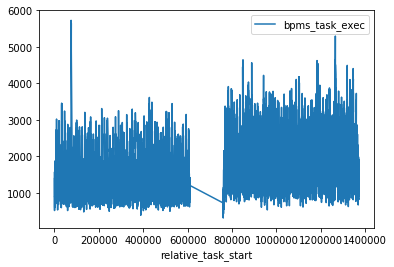

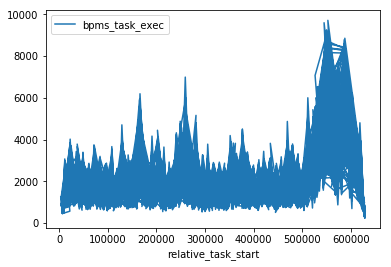

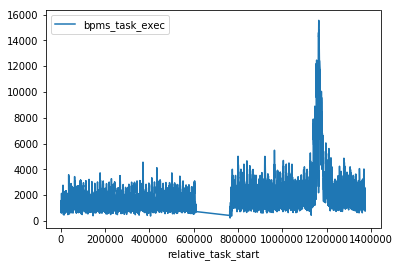

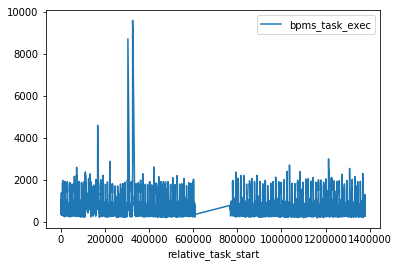

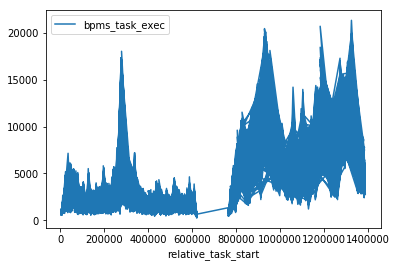

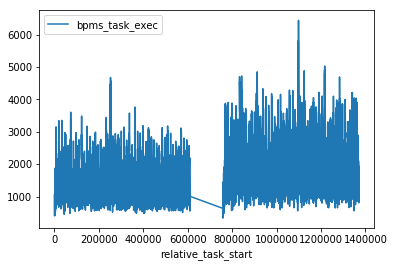

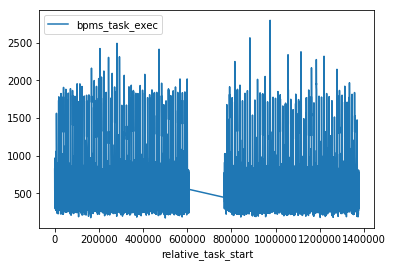

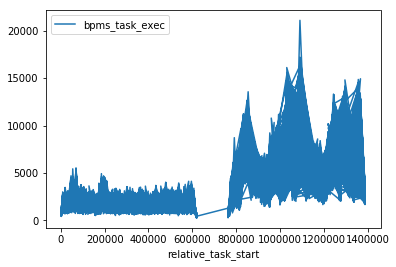

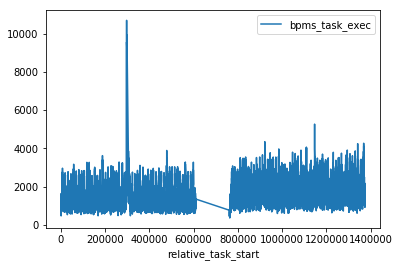

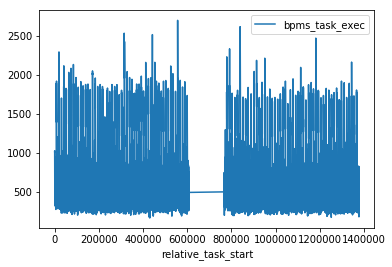

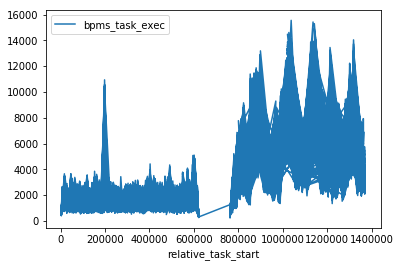

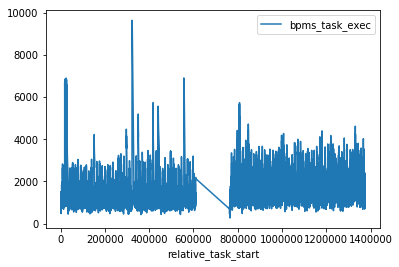

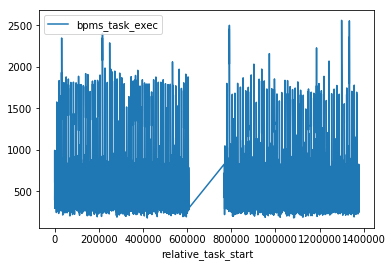

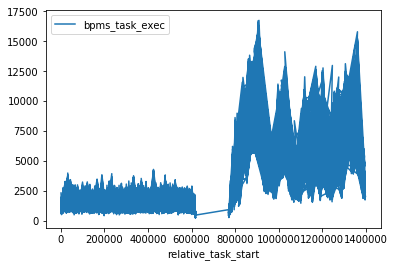

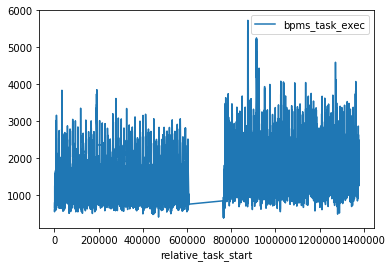

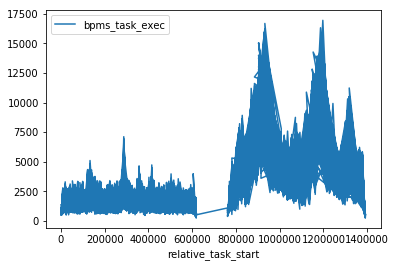

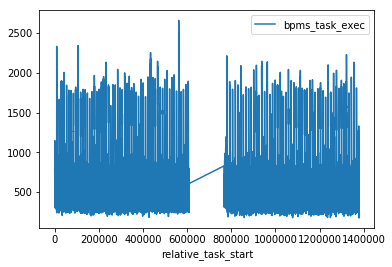

In [206]:
all_data.groupby("experiment").plot("relative_task_start", "bpms_task_exec")

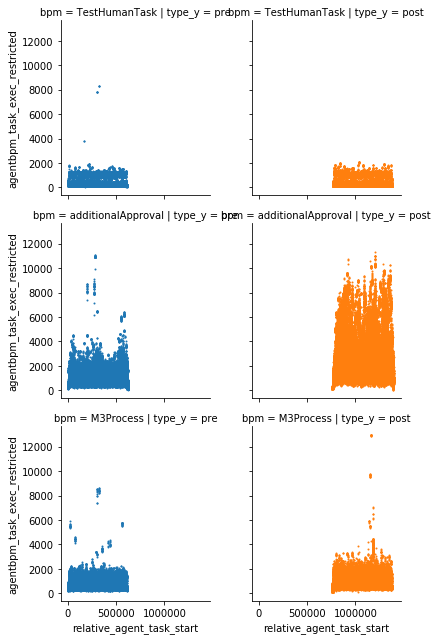

In [194]:
g = sns.FacetGrid(all_data, col="type_y",  row="bpm", hue="type_y")
g = (g.map(plt.scatter, "relative_agent_task_start", "agentbpm_task_exec_restricted", s=1))

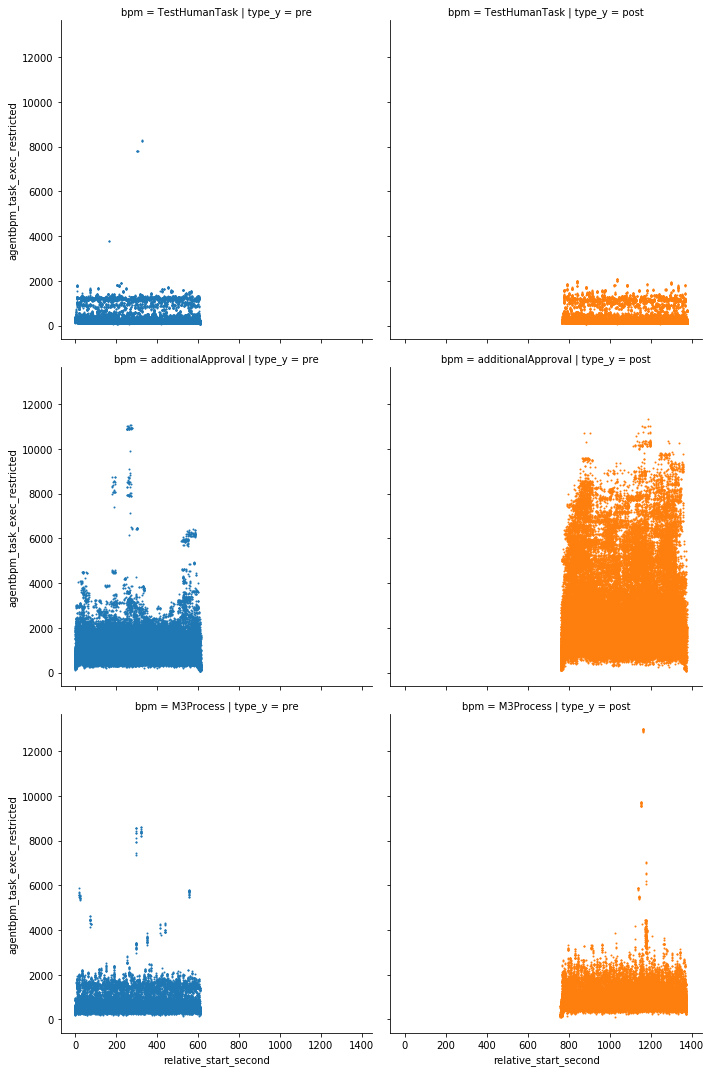

In [174]:
all_data["relative_start_second"] = all_data["relative_start"]//1000

g = sns.FacetGrid(all_data, col="type_y",  row="bpm", hue="type_y",size=5)
g = (g.map(plt.scatter, "relative_start_second", "agentbpm_task_exec_restricted", s=1))

In [177]:
all_data["relative_start_second_min"] = 0
dfmin = all_data[all_data["type_y"]=="post"].groupby('experiment').min().add_suffix('_min').reset_index()
for experiment in dfmin["experiment"]:
    rss = dfmin[dfmin.experiment == experiment]["relative_start_second_min"].item()
    all_data.loc[(all_data.type_y=="post") & (all_data.experiment==experiment), "relative_start_second_min"] = rss

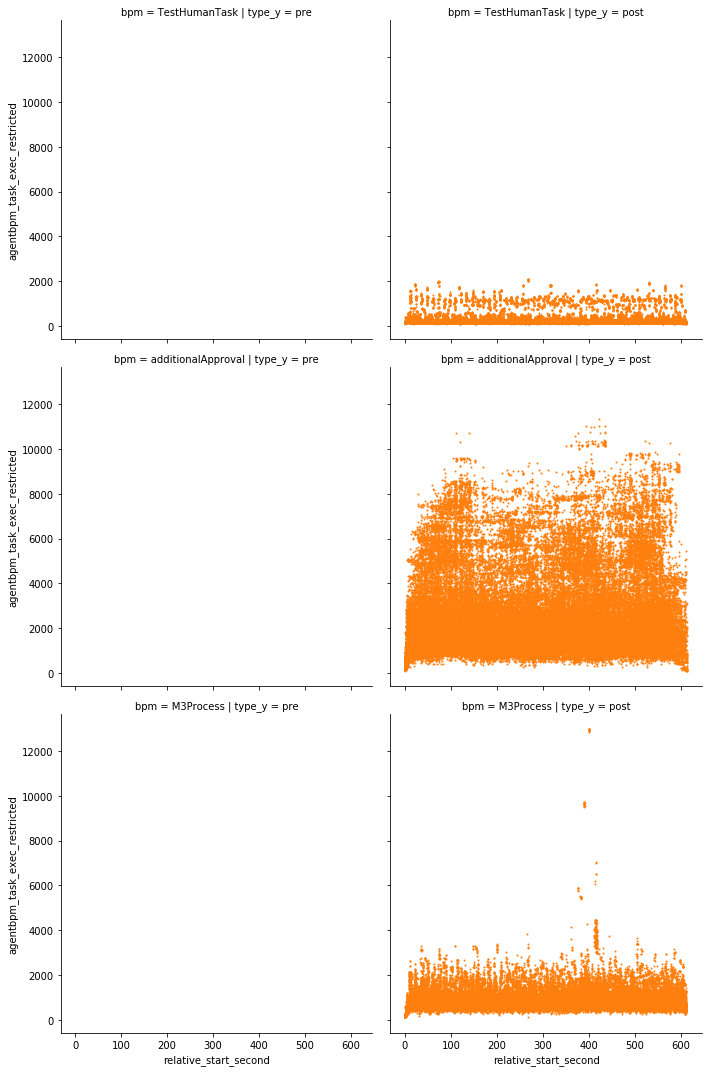

In [178]:
all_data["relative_start_second"] = all_data["relative_start_second"] - all_data["relative_start_second_min"]
g = sns.FacetGrid(all_data, col="type_y",  row="bpm", hue="type_y",size=5)
g = (g.map(plt.scatter, "relative_start_second", "agentbpm_task_exec_restricted", s=1))

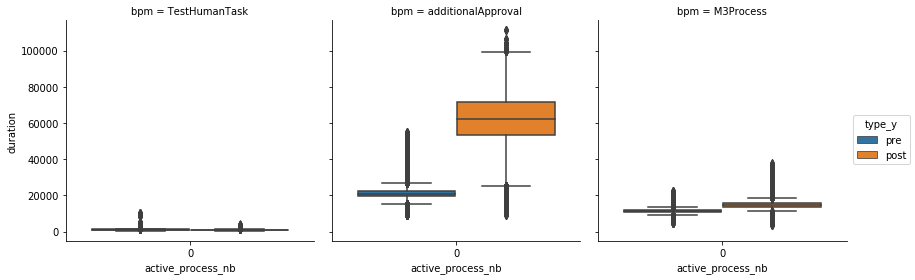

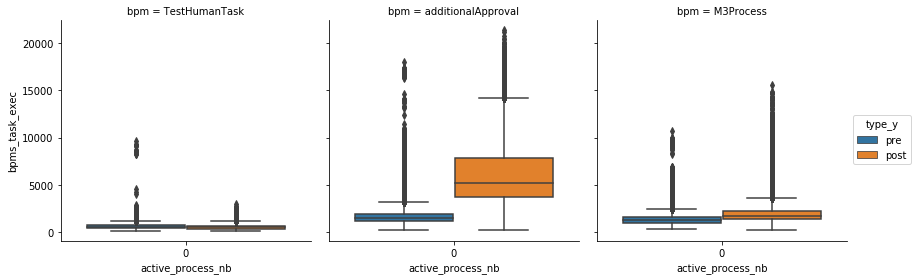

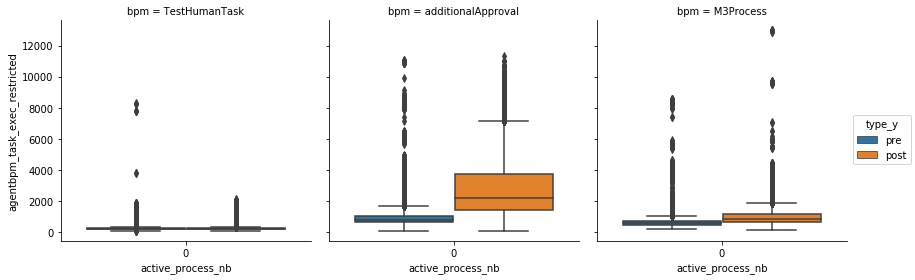

In [202]:

#f = all_data.set_index(pd.DatetimeIndex(all_data["relative_start"])).resample("1s", how="mean")

#df.resample("1s", how="mean").plot(y="duration", style="ro",ax=ax)
#sns.factorplot(x="start", y="duration", hue="faban_agent", data=df)
#g = sns.FacetGrid(all_data, col="active_process_nb",  row="faban_agent", hue="type")
#g = (g.map(sns.boxplot, "start", "duration"))
sns.factorplot(x="active_process_nb", y="duration", col="bpm", hue="type_y",  data=all_data, kind="box", ci="sd")
sns.factorplot(x="active_process_nb", y="bpms_task_exec", col="bpm", hue="type_y",  data=all_data, kind="box", ci="sd")
#sns.factorplot(x="active_process_nb", y="agentbpm_task_exec", col="bpm", hue="type_y",  data=all_data, kind="box", ci="sd")
sns.factorplot(x="active_process_nb", y="agentbpm_task_exec_restricted", col="bpm", hue="type_y",  data=all_data, kind="box", ci="sd")

#df[df["type"] =="pre"].groupby(["faban_agent"]).plot(y="duration", style="ro", ax=ax)
#df[df["type"] =="post"].groupby(["faban_agent"]).plot(y="duration", style="bx",ax=ax)
#df.groupby("faban_agent").resample("1s", how="mean").plot(y="duration", style="ro",ax=ax)
#fig, ax = plt.subplots()
#df[df["type"] =="pre"].groupby(["faban_agent"]).mean().plot(y="duration", ax=ax, label="pre")
#df[df["type"] =="post"].groupby(["faban_agent"]).mean().plot(y="duration", ax=ax, label="post")
#fig, ax = plt.subplots()
#df[df["type"] =="pre"].groupby(["faban_agent"]).std().plot(y="duration", ax=ax, label="pre")
#df[df["type"] =="post"].groupby(["faban_agent"]).std().plot(y="duration", ax=ax, label="post")


In [128]:
all_data.groupby(["bpm","type_y"])["duration"].describe()

count          mean           std     min  \
bpm                type_y                                                
M3Process          post    40018.0  14864.162552   2112.751429  3365.0   
                   pre     38600.0  11419.028653   1310.714646  4630.0   
TestHumanTask      post    57690.0   1006.243820    382.806346   367.0   
                   pre     50656.0   1060.874052    448.532342   414.0   
additionalApproval post    64561.0  61707.590449  15211.370412  9396.0   
                   pre     78041.0  21768.037173   4413.249213  9084.0   

                               25%      50%      75%       max  
bpm                type_y                                       
M3Process          post    13805.0  14666.0  15603.0   37691.0  
                   pre     10779.0  11324.0  11906.0   22563.0  
TestHumanTask      post      752.0    937.0   1091.0    3897.0  
                   pre       802.0    976.0   1134.0   10219.0  
additionalApproval post    53174.0  62421.0  71733.0  111143.0  
                   pre     19598.0  20893.0  22536.0   54830.0

In [129]:
all_data.groupby(["bpm","type_y"])["bpms_task_exec"].describe()

count         mean          std    min     25%  \
bpm                type_y                                                     
M3Process          post    40320.0  1941.955828   938.862520  235.0  1391.0   
                   pre     38600.0  1418.887979   604.099067  383.0  1043.0   
TestHumanTask      post    57690.0   616.167412   319.842776  169.0   394.0   
                   pre     50656.0   649.086189   358.756819  165.0   425.0   
additionalApproval post    67041.0  6036.594263  3127.843980  233.0  3690.0   
                   pre     78041.0  1710.846811   931.670307  238.0  1171.0   

                              50%     75%      max  
bpm                type_y                           
M3Process          post    1781.0  2281.0  15553.0  
                   pre     1304.0  1629.0  10696.0  
TestHumanTask      post     574.0   727.0   2994.0  
                   pre      600.0   748.0   9609.0  
additionalApproval post    5259.0  7876.0  21321.0  
                   pre     1478.0  1984.0  18021.0

In [130]:
all_data.groupby(["bpm","type_y"])["agentbpm_task_exec"].describe()

count         mean          std    min     25%  \
bpm                type_y                                                     
M3Process          post    40326.0   991.011159   544.500475  122.0   669.0   
                   pre     38600.0   679.356813   431.203771  178.0   478.0   
TestHumanTask      post    57690.0   259.154498   232.433275   87.0   171.0   
                   pre     50656.0   273.667423   260.133342   70.0   178.0   
additionalApproval post    67436.0  2901.189098  1911.789248   66.0  1485.0   
                   pre     78041.0   974.544483   627.563395   76.0   633.0   

                              50%     75%      max  
bpm                type_y                           
M3Process          post     856.0  1149.0  12987.0  
                   pre      563.0   697.0   8593.0  
TestHumanTask      post     195.0   228.0   2091.0  
                   pre      204.0   238.0   8285.0  
additionalApproval post    2288.0  3794.0  11393.0  
                   pre      790.0  1079.0  11071.0

In [132]:
all_data.groupby(["bpm","type_y"])["agentbpm_task_exec_restricted"].describe()

count         mean          std    min     25%  \
bpm                type_y                                                     
M3Process          post    40326.0   974.956306   539.404427  115.0   659.0   
                   pre     38600.0   671.440104   428.480640  171.0   472.0   
TestHumanTask      post    57690.0   250.926590   227.569094   84.0   165.0   
                   pre     50656.0   265.411244   255.423479   67.0   173.0   
additionalApproval post    67436.0  2826.031867  1919.654163   64.0  1400.0   
                   pre     78041.0   952.732410   618.580796   74.0   620.0   

                              50%      75%      max  
bpm                type_y                            
M3Process          post     842.0  1129.00  12981.0  
                   pre      557.0   689.25   8589.0  
TestHumanTask      post     189.0   221.00   2087.0  
                   pre      198.0   232.00   8283.0  
additionalApproval post    2195.0  3703.00  11330.0  
                   pre      775.0  1049.00  11056.0

In [135]:
df_migr

,ts,nb,duration_disable,duration_move,duration_enable,duration_total,experiment,bpm,min_start,relative_start,relative_end,end_pre,begin_post,end_post,begin_pre
ts,,,,,,,,,,,,,,,
2018-07-19 01:06:43.373952,2018-07-19 01:06:43.373952,0,0.157292,2.336716,2.465238,4.959246,xp2_migr_3-100_100_0_TestHumanTask,TestHumanTask,2018-07-19 00:55:40.211,663162.0,668121.245682,607438,766942,1.378e+06,0.0
2018-07-19 02:29:56.593525,2018-07-19 02:29:56.593525,0,0.148157,2.142995,2.455690,4.746842,xp2_migr_4-100_100_0_additionalApproval,additionalApproval,2018-07-19 02:18:58.065,658528.0,663274.841908,609832,768493,1.38092e+06,0.0
2018-07-17 16:18:28.004291,2018-07-17 16:18:28.004291,0,0.175447,2.114557,2.714881,5.004885,xp2_migr_2-100_100_0_additionalApproval,additionalApproval,2018-07-17 16:07:33.362,654642.0,659646.884958,611471,761268,1.37325e+06,0.0
2018-07-17 15:51:49.674355,2018-07-17 15:51:49.674355,0,0.148467,2.583950,2.721827,5.454244,xp2_migr_1-100_100_0_additionalApproval,additionalApproval,2018-07-17 15:40:52.445,657229.0,662683.243660,613055,763416,1.37813e+06,0.0
2018-07-19 02:03:31.958945,2018-07-19 02:03:31.958945,0,0.173493,2.408963,2.678340,5.260796,xp2_migr_3-100_100_0_additionalApproval,additionalApproval,2018-07-19 01:52:36.927,655031.0,660291.796070,611078,760468,1.37351e+06,0.0
2018-07-17 14:32:36.137984,2018-07-17 14:32:36.137984,0,0.150239,2.165908,3.121598,5.437745,xp2_migr_1-100_100_0_TestHumanTask,TestHumanTask,2018-07-17 14:21:33.858,662279.0,667716.744856,608656,767739,1.37884e+06,0.0
2018-07-17 13:36:45.808525,2018-07-17 13:36:45.808525,0,0.160560,2.617066,2.591274,5.368900,xp2_migr_600-100_100_0_TestHumanTask,TestHumanTask,2018-07-17 13:25:43.990,661818.0,667186.900061,609185,767157,1.37824e+06,0.0
2018-07-19 03:23:17.204065,2018-07-19 03:23:17.204065,0,0.149854,3.530906,2.708820,6.389580,xp2_migr_3-100_100_0_M3Process,M3Process,2018-07-19 03:12:22.299,654905.0,661294.580250,608818,761705,1.37393e+06,0.0
2018-07-17 17:11:28.819712,2018-07-17 17:11:28.819712,0,0.148721,2.401622,2.725902,5.276245,xp2_migr_1-100_100_0_M3Process,M3Process,2018-07-17 17:00:33.694,655125.0,660401.245117,608249,762066,1.37356e+06,0.0


In [207]:
df_migr

,ts,nb,duration_disable,duration_move,duration_enable,duration_total,experiment,bpm,min_start,relative_start,relative_end,end_pre,begin_post,end_post,begin_pre
ts,,,,,,,,,,,,,,,
2018-07-19 01:06:43.373952,2018-07-19 01:06:43.373952,0,0.157292,2.336716,2.465238,4.959246,xp2_migr_3-100_100_0_TestHumanTask,TestHumanTask,2018-07-19 00:55:40.211,663162.0,668121.245682,607438,766942,1.378e+06,0.0
2018-07-19 02:29:56.593525,2018-07-19 02:29:56.593525,0,0.148157,2.142995,2.455690,4.746842,xp2_migr_4-100_100_0_additionalApproval,additionalApproval,2018-07-19 02:18:58.065,658528.0,663274.841908,609832,768493,1.38092e+06,0.0
2018-07-17 16:18:28.004291,2018-07-17 16:18:28.004291,0,0.175447,2.114557,2.714881,5.004885,xp2_migr_2-100_100_0_additionalApproval,additionalApproval,2018-07-17 16:07:33.362,654642.0,659646.884958,611471,761268,1.37325e+06,0.0
2018-07-17 15:51:49.674355,2018-07-17 15:51:49.674355,0,0.148467,2.583950,2.721827,5.454244,xp2_migr_1-100_100_0_additionalApproval,additionalApproval,2018-07-17 15:40:52.445,657229.0,662683.243660,613055,763416,1.37813e+06,0.0
2018-07-19 02:03:31.958945,2018-07-19 02:03:31.958945,0,0.173493,2.408963,2.678340,5.260796,xp2_migr_3-100_100_0_additionalApproval,additionalApproval,2018-07-19 01:52:36.927,655031.0,660291.796070,611078,760468,1.37351e+06,0.0
2018-07-17 14:32:36.137984,2018-07-17 14:32:36.137984,0,0.150239,2.165908,3.121598,5.437745,xp2_migr_1-100_100_0_TestHumanTask,TestHumanTask,2018-07-17 14:21:33.858,662279.0,667716.744856,608656,767739,1.37884e+06,0.0
2018-07-17 13:36:45.808525,2018-07-17 13:36:45.808525,0,0.160560,2.617066,2.591274,5.368900,xp2_migr_600-100_100_0_TestHumanTask,TestHumanTask,2018-07-17 13:25:43.990,661818.0,667186.900061,609185,767157,1.37824e+06,0.0
2018-07-19 03:23:17.204065,2018-07-19 03:23:17.204065,0,0.149854,3.530906,2.708820,6.389580,xp2_migr_3-100_100_0_M3Process,M3Process,2018-07-19 03:12:22.299,654905.0,661294.580250,608818,761705,1.37393e+06,0.0
2018-07-17 17:11:28.819712,2018-07-17 17:11:28.819712,0,0.148721,2.401622,2.725902,5.276245,xp2_migr_1-100_100_0_M3Process,M3Process,2018-07-17 17:00:33.694,655125.0,660401.245117,608249,762066,1.37356e+06,0.0
